# Hyper-Parameters Tunning (Life Expectancy ; WHO)

In [32]:
from pprint import pprint
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
model = RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [3]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Random Hyperparameter Grid`

In [4]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [5]:
data=pd.read_csv('Converted_life_Data',index_col=[0])

<IPython.core.display.Javascript object>

In [6]:
X=data.drop(['Life expectancy'],axis=1).values
y=data['Life expectancy'].values

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 213)
(882, 213)
(2056,)
(882,)


# Random Search Training

In [8]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [9]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [36]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    R2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    # RMSE=math.sqrt(mean_squared_error(y_test, y_pred))
    print('Model Performance')
    print('R2: {:0.3f}'.format(R2*100))
    print('MSE Score: {:0.3f}'.format(MSE*100))
    # print('RMSE Score: {:0.3f}'.format(RMSE*100))
    
    return [r2_score, mean_squared_error]

# Evaluate Random Search

#### baseline score

In [37]:
base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_score = evaluate(base_model, X_test, y_test)

Model Performance
R2: 96.565
MSE Score: 321.313


#### best model score

In [38]:
best_random = rf_random.best_estimator_
random_score = evaluate(best_random, X_test, y_test)

Model Performance
R2: 96.624
MSE Score: 315.748


### Improvement

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_score[0] - base_score[0]) / base_score[0]))

In [49]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70, 80, 90, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400, 500]
}


# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

<IPython.core.display.Javascript object>

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


# Grid Search with Cross Validation

### Improvement

# Conclusions:

- So, effectively, the only features that are valuable for us or that have any impact on the dependent variable are:

- Alcohol, BMI, Polio, Diphtheria, GDP, Income composition of resources and Schooling.

# Key Questions: Answers

- Do various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting life expectancy?

- Yes,
- The predicting factors do affect life expectancy in one way or the another. Alcohol, Polio, Diphtheria have significant impact on life expectancy. 

- Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan

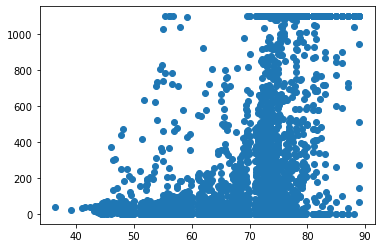

In [54]:
life = data['Life expectancy'].tolist()
exp = data['percentage expenditure'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, exp)

- Significant impact of total expenditure on Life expectancy having age greater than 65 years.

- How do Infant and Adult mortality rates affect life expectancy?

- The correlation between infant deaths rate and adult mortality rate and the average lifespan is as follows:
- infant deaths  and Lifespan: -0.196557
- Adult morality and Lifespan: -0.696359
- the correlation between these two and average lifespan is negative, which means that if the infant mortality rate or the adult mortality rate rises, then the average lifespan decrease.

- Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.?


Let's see the correlation between the life expectancy and various lifestyle habits like Alcohol.
Alcohol and Lifespan: 0.404877 
So, we can say that alcohol affects the life expectancy upto some extent as seen by the correlation coefficient!

- What is the impact of schooling on the lifespan of humans?

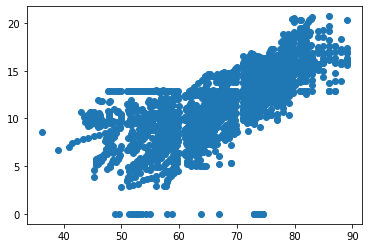

In [58]:
sch = data['Schooling'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, sch)

We can see that schooling has a very strong direct correlation with the average lifespan, with a Pearson's correlation coefficient of 0.75. This may be due to the fact that schooling teaches many things about a healthy lifestyle and even first aids, which can be life saving in critical conditions

- Do densely populated countries tend to have lower life expectancy?

The correlation coefficient of the population of a country and the life expectancy is -0.021538, which basically means that if the population rises, then the life expectancy decrease. This may be due to the fact the more population have severe effect on the capacity of the health system and it may crash because of this